In [4]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
from matplotlib.pyplot import boxplot as вусата_коробочка
import statsmodels.formula.api as sm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
data = pd.read_excel('team5.xlsx',sheet_name=4,usecols = [3,4,5],skiprows = range(42,245) )

### Побудова вибіркових характеристик

In [6]:
def вибіркові_характеристики(data):
    середнє = data.mean()
    дисперсія = data.std()
    медіана = data.median()
    перший_квартиль = np.percentile(data,25)
    третій_квартиль = np.percentile(data,75)
    інтерквартильний_розмах = третій_квартиль - перший_квартиль
    result = pd.DataFrame([середнє, дисперсія,медіана,перший_квартиль,третій_квартиль,інтерквартильний_розмах],
                         index = ['середнє', 'дисперсія','медіана','перший_квартиль','третій_квартиль','інтерквартильний_розмах'],
                         columns = ['значення'])
    return result
коефіцієнт_кореляції_Пірсона = pearsonr(data['IncidenceASR'],data['Mortality'])# коефіцієнт, p-value

In [7]:
print("захворювання")
вибіркові_характеристики(data['IncidenceASR'])

захворювання


,значення
середнє,295.430000
дисперсія,49.827509
медіана,302.900000
перший_квартиль,267.150000
третій_квартиль,330.325000
інтерквартильний_розмах,63.175000


In [8]:
print("смертність")
вибіркові_характеристики(data['Mortality'])

смертність


,значення
середнє,148.072500
дисперсія,30.875283
медіана,143.050000
перший_квартиль,124.875000
третій_квартиль,175.475000
інтерквартильний_розмах,50.600000


In [9]:
коефіцієнт_кореляції_Пірсона=  pearsonr(data['IncidenceASR'],data['Mortality'])
print('коефіцієнт кореляції Пірсона = %s, p-значення = %s'%(коефіцієнт_кореляції_Пірсона[0],коефіцієнт_кореляції_Пірсона[1]))

коефіцієнт кореляції Пірсона = 0.10503079593380228, p-значення = 0.5189292906085169


{'whiskers': [<matplotlib.lines.Line2D at 0x1d6c595f3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6c595fc88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6c595f278>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6c596f518>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6c596f940>],
 'means': []}

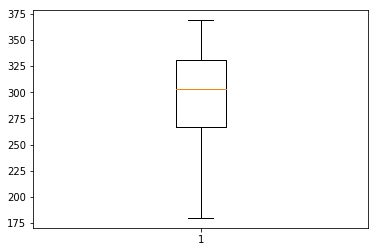

In [10]:
вусата_коробочка(data['IncidenceASR'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d6c59e4e48>,
 'caps': [<matplotlib.lines.Line2D at 0x1d6c59ed748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d6c59e4cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1d6c59edf98>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d6c59f6400>],
 'means': []}

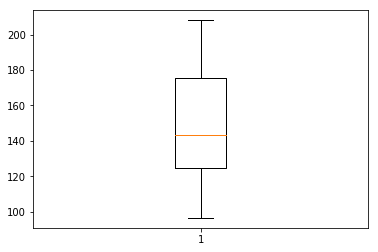

In [11]:
вусата_коробочка(data['Mortality'])

### Оцінка параметрів лінійної регресії

In [12]:
z = sm.ols(formula = 'y~x1',data = pd.DataFrame({'y':data['IncidenceASR'],'x1':data['Mortality']}))

In [13]:
z.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.4239
Date:                Fri, 29 Jun 2018   Prob (F-statistic):              0.519
Time:                        16:40:49   Log-Likelihood:                -212.37
No. Observations:                  40   AIC:                             428.7
Df Residuals:                      38   BIC:                             432.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    270.3314     39.359      6.868      0.000     190.653     350.010
x1             0.1695      0.260      0.651      0.519      -0.358       0.697
==============================================================================
Omnibus:                        2.737   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.548
Skew:                          -0.581   Prob(JB):                        0.280
Kurtosis:                       2.578   Cond. No.                         750.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
data

,IncidenceASR,Mortality
0,185.0,130.9
1,295.2,129.4
2,275.5,186.0
3,364.8,151.0
4,180.0,125.4
5,260.5,160.5
6,319.9,190.7
7,218.2,96.4
8,345.9,158.1
9,354.3,142.7


In [15]:
a = []
for i in range(40):
    a.append(data['IncidenceASR'][i])
    a.append(data['Mortality'][i])
a.sort()

In [16]:
ранг = []
СумаРанговX = 0
for i in range(len(data['IncidenceASR'])):
    for j in range(len(a)):
        if data['IncidenceASR'][i] == a[j]:
            ранг.append(j)
    СумаРанговX += sum(ранг)/(len(ранг))
    ранг = []
СумаРанговX    

2364.5

In [17]:
ранг = []
СумаРанговY = 0
for i in range(len(data['Mortality'])):
    for j in range(len(a)):
        if data['Mortality'][i] == a[j]:
            ранг.append(j)
    СумаРанговY += sum(ранг)/(len(ранг))
    ранг = []
СумаРанговY  

795.5

In [18]:
nmax = max(len(),len(data['IncidenceASR']))
Uemp = len(data['Mortality'])*len(data['IncidenceASR']) + (nmax*(nmax+1))/2 - max(СумаРанговX, СумаРанговY)
Uemp

TypeError: len() takes exactly one argument (0 given)

In [19]:
Ukr = 557

In [20]:
#различия в уровнях выборок можно считать существенными

In [21]:
AA = [[data['IncidenceASR'][i],data['Mortality'][i]] for i in range(len(data['Mortality']))]
km = KMeans(n_clusters=2).fit( AA)

In [22]:
clusters = np.array(km.fit_predict(AA))

In [23]:
clust1 = [AA[i] for i in range(len(AA)) if clusters[i] == 1]
clust2 = [AA[i] for i in range(len(AA)) if clusters[i] == 0]

In [24]:
z1 = sm.ols(formula = 'y~x1',data = pd.DataFrame({'y':[clust1[i][1] for i in range(len(clust1))],'x1':[clust1[i][0] for i in range(len(clust1))]}))

In [25]:
z1.fit().summary()

c:\programdata\miniconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     6.944
Date:                Fri, 29 Jun 2018   Prob (F-statistic):             0.0218
Time:                        16:40:54   Log-Likelihood:                -63.421
No. Observations:                  14   AIC:                             130.8
Df Residuals:                      12   BIC:                             132.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.5693     48.285      0.571      0.579     -77.636     132.774
x1             0.5257      0.200      2.635      0.022       0.091       0.960
==============================================================================
Omnibus:                       13.731   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.448
Skew:                          -1.794   Prob(JB):                      0.00888
Kurtosis:                       4.822   Cond. No.                     1.80e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
z2 =  sm.ols(formula = 'y~x1',data = pd.DataFrame({'y':[clust2[i][1] for i in range(len(clust2))],'x1':[clust2[i][0] for i in range(len(clust2))]}))

In [27]:
z2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     1.789
Date:                Fri, 29 Jun 2018   Prob (F-statistic):              0.194
Time:                        16:40:56   Log-Likelihood:                -125.44
No. Observations:                  26   AIC:                             254.9
Df Residuals:                      24   BIC:                             257.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.4627     82.182      0.432      0.670    -134.152     205.077
x1             0.3369      0.252      1.337      0.194      -0.183       0.857
==============================================================================
Omnibus:                        3.042   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.157
Skew:                           0.532   Prob(JB):                        0.340
Kurtosis:                       2.072   Cond. No.                     4.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

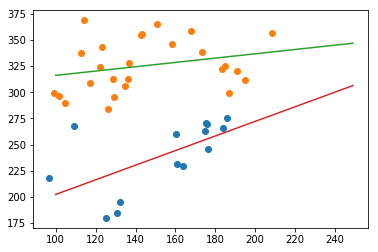

In [28]:
plt.plot([clust1[i][1] for i in range(len(clust1))],[clust1[i][0] for i in range(len(clust1))],'o')
plt.plot([clust2[i][1] for i in range(len(clust2))],[clust2[i][0] for i in range(len(clust2))],'o')
x = np.arange(100,250)
plt.plot(x, 0.2059*x + 295.4931)
plt.plot(x, 0.6973*x + 132.7052)


In [29]:
AA

[[185.0, 130.9],
 [295.2, 129.4],
 [275.5, 186.0],
 [364.8, 151.0],
 [180.0, 125.4],
 [260.5, 160.5],
 [319.9, 190.7],
 [218.2, 96.4],
 [345.9, 158.1],
 [354.3, 142.7],
 [321.9, 183.2],
 [290.1, 104.9],
 [356.0, 143.4],
 [265.5, 183.9],
 [323.7, 122.1],
 [194.8, 132.2],
 [356.1, 208.2],
 [299.5, 99.3],
 [343.3, 123.3],
 [312.9, 128.6],
 [325.0, 185.0],
 [311.8, 194.9],
 [309.1, 117.2],
 [267.7, 109.0],
 [262.7, 174.8],
 [368.7, 114.3],
 [269.2, 176.0],
 [306.3, 134.7],
 [230.0, 163.6],
 [271.0, 175.3],
 [245.8, 176.3],
 [299.2, 186.7],
 [338.2, 173.4],
 [358.2, 167.7],
 [312.8, 136.1],
 [296.8, 101.7],
 [337.9, 112.6],
 [327.8, 136.5],
 [231.9, 160.9],
 [284.0, 126.0]]